## Pobranie danych

In [69]:
aimport pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import statistics

df = pd.read_excel('./NewData.xlsx')
data = df.loc[:, ~df.columns.str.contains('^Unnamed')]
data.head()


,yr,season,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,1,0,0,6,1,-1.334648,-1.093425,0.863767,-1.553833,3,13,16
1,0,1,1,1,0,6,1,-1.438516,-1.181597,0.966997,-1.553833,8,32,40
2,0,1,1,2,0,6,1,-1.438516,-1.181597,0.966997,-1.553833,5,27,32
3,0,1,1,3,0,6,1,-1.334648,-1.093425,0.708922,-1.553833,3,10,13
4,0,1,1,4,0,6,1,-1.334648,-1.093425,0.192772,-1.553833,0,1,1


## Podział danych na treningowe i testowe

In [70]:
from sklearn.utils import shuffle

def train_test_split(X, Y, test_size):
    train_pct_index = int((1 - test_size) * len(X))
    X_train, X_test = X[:train_pct_index], X[train_pct_index:]
    y_train, y_test = Y[:train_pct_index], Y[train_pct_index:]
    return X_train, X_test, y_train, y_test


def splitOfData(dataInput, testSize, random_state = 50):
    shuffle_data =  shuffle(dataInput, random_state=random_state)
    X = (shuffle_data.iloc[:,:11])
    Y = (shuffle_data.iloc[:,13:14])
    return train_test_split(X, Y, test_size=testSize)

x_train, x_test, y_train, y_test = splitOfData(data, 0.20)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (13903, 11)
x_test.shape:  (3476, 11)
y_train.shape:  (13903, 1)
y_test.shape:  (3476, 1)


## Miary Skuteczności

In [135]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_MSE(predykcja, Y):
    m = len(Y)
    suma = 0
    for i in range(m):
        suma += (predykcja[i] - Y[i])**2
    return (suma / (2 * m))[0]


## Regresja Liniowa

coefficients:
 [ 8.09210187e+01  1.91502732e+01  7.72363695e-02  7.76115017e+00
 -2.28554576e+01  2.45336817e+00 -6.44376023e+00  1.96415552e+01
  3.65873869e+01 -3.45561788e+01  6.26229020e+00]


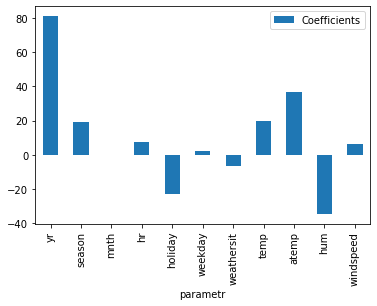

Mean squared error: 20177.21
Mean squared error: 10088.61
Variance score: 0.38581


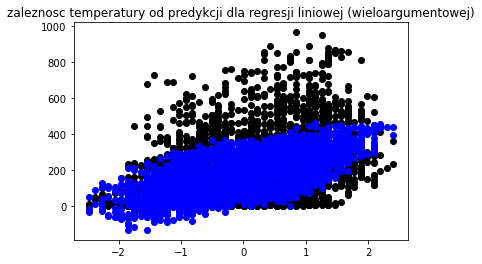

In [138]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train, y_train)

linear_reg_y_pred = linear_reg.predict(x_test)
linear_reg_coefficients = linear_reg.coef_[0]

print("coefficients:\n", linear_reg_coefficients)
index = ['yr', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
coefficients_frame = pd.DataFrame({'parametr': index, 'Coefficients': linear_reg_coefficients})
coefficients_frame.plot.bar(x='parametr', y='Coefficients', rot=90)
plt.show()

print("Mean squared error: %.2f" % mean_squared_error(y_test, linear_reg_y_pred))
print("Mean squared error: %.2f" % calculate_MSE(linear_reg_y_pred, y_test.to_numpy()))
print("Variance score: %.5f" % linear_reg.score(x_test, y_test))
plt.scatter(x_test["temp"], y_test, color="black")
plt.scatter(x_test["temp"], linear_reg_y_pred, color="blue")
plt.title("zaleznosc temperatury od predykcji dla regresji liniowej (wieloargumentowej)")
plt.show()
    

## Regresja wielomianowa

Mean squared error: 7665.72
Variance score: 0.53332


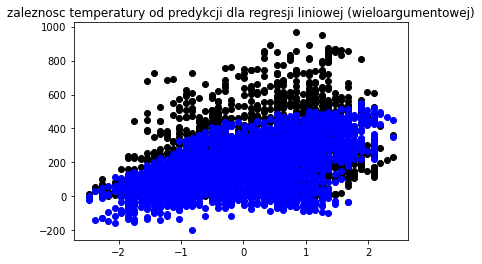

In [134]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(2)
poly_x_train = poly_reg.fit_transform(x_train)
poly_x_test = poly_reg.fit_transform(x_test)

lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(poly_x_train, y_train)
lin_reg_2_pred = lin_reg_2.predict(poly_x_test)

print("Mean squared error: %.2f" % calculate_MSE(lin_reg_2_pred, y_test.to_numpy()))
print("Variance score: %.5f" % lin_reg_2.score(poly_x_test, y_test))
plt.scatter(x_test["temp"], y_test, color="black")
plt.scatter(x_test["temp"], lin_reg_2_pred, color="blue")
plt.title("zaleznosc temperatury od predykcji dla regresji liniowej (wieloargumentowej)")
plt.show()

# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491